## 1. Import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from IPython.display import display

plt.style.use('fivethirtyeight')
%matplotlib inline

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2. Data Analysis

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [4]:
train.head()
#print(test.head())

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                      factsguide: society now    #motivation

In [5]:
test.head()

id  \
0  31963   
1  31964   
2  31965   
3  31966   
4  31967   

                                                                                                                                            tweet  
0                                                      #studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦   
1                                            @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why    
2                                                                         safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!   
3  is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite  
4                                                     3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦

In [33]:
# Label encodings
labels = {0: "not offensive", 1: "offensive"}
print(labels)

{0: 'not offensive', 1: 'offensive'}


### Train VS Test datasets

In [34]:
train.shape, test.shape

((31962, 3), (17197, 2))

Train set has 31,962 tweets and test set has 17,197 tweets. 

**A. Train dataset**

In [35]:
#Training data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**Info:** 

* The train dataset has three columns - "id", "label", "tweet"
    * **Column "id"** is not useful for classification.
    * **Column "tweet"** contains the tweets 
    * **Column "label"** contains their category.
* We have 31962 data points and there are no null values present.

In [36]:
# Train data description
train.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

**B. Test dataset**

In [37]:
#Test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


**Info:** We have approx 17197 data points and there are no null values present.

In [38]:
# Test data description
test.describe()

id
count  17197.000000
mean   40561.000000
std     4964.490625
min    31963.000000
25%    36262.000000
50%    40561.000000
75%    44860.000000
max    49159.000000

**Analysis of Tweet Length**

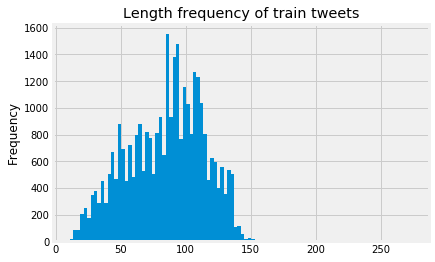

In [39]:
# Training Set
train['tweet'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of Train tweets')
plt.show()

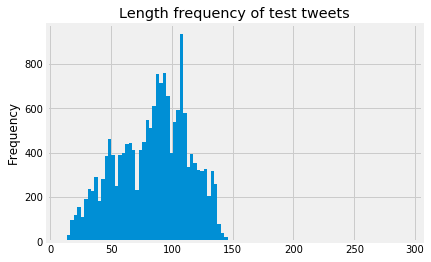

In [40]:
# Test Set
test['tweet'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of Test tweets')
plt.show()

The above histogram describes the length frequency of the tweets. Most tweet lengths lie between 70-120.

### Positive vs Negative tweets

In [41]:
# Negative Tweets from training set
train[train['label'] == 0].head(10)

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   
5   6      0   
6   7      0   
7   8      0   
8   9      0   
9  10      0   

                                                                                                                                             tweet  
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                              bihday your majesty  
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                                           factsguide: society now    #motivation  
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦  
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl  
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦   
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !

In [42]:
# Positive Tweets from training set
train[train['label'] == 1].head(10)

id  label  \
13    14      1   
14    15      1   
17    18      1   
23    24      1   
34    35      1   
56    57      1   
68    69      1   
77    78      1   
82    83      1   
111  112      1   

                                                                                                                                 tweet  
13                                                          @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot    
14                               no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins  
17                                                                                                              retweet if you agree!   
23                                                                                     @user @user lumpy says i am a . prove it lumpy.  
34                            it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia   
56                                                                                             @user lets fight against  #love #peace   
68                      ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness    
77                                             @user hey, white people: you can call people 'white' by @user  #race  #identity #medâ¦  
82                                                       how the #altright uses  &amp; insecurity to lure men into #whitesupremacy      
111  @user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦

### Label Distribution

In [6]:
# Get Counts
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [44]:
# Get Count Percentages
counts = pd.DataFrame({
    'Label': train['label'].value_counts().index,
    'Count': train['label'].value_counts().values,
    'Percentage':  train['label'].value_counts().values/train.shape[0]
})
counts.head()

Label  Count  Percentage
0      0  29720    0.929854
1      1   2242    0.070146

Tweets without hate speech represents almost 93% of the dataset

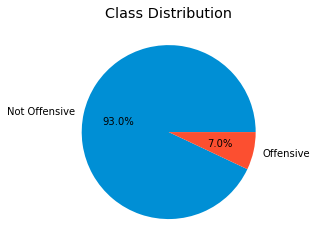

In [8]:
#Frequency plot of classes 
data = train['label'].value_counts()
plt.pie(data, autopct='%1.1f%%', labels=['Not Offensive','Offensive'])
plt.title('Class Distribution');
plt.show()

**Unbalanced Data**

In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge. Due to this class imbalance, **accuracy** may not be a good option for checking performance of our models. Instead, **confusion matrix** can be a good option as it gives an insight which classes are being predicted correctly, which incorrectly, and what type of errors are being made.

### Tweet Length Analysis 

In [10]:
#Creating the Length column for tweet
train['pre_clean_len']=  [len(t) for t in train.tweet]
train

id  label  \
0          1      0   
1          2      0   
2          3      0   
3          4      0   
4          5      0   
...      ...    ...   
31957  31958      0   
31958  31959      0   
31959  31960      0   
31960  31961      1   
31961  31962      0   

                                                                                                                                     tweet  \
0                                    @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1               @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                      bihday your majesty   
3                                                   #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                   factsguide: society now    #motivation   
...                                                                                                                                    ...   
31957                                                                 ate @user isz that youuu?ðððððððððâ¤ï¸    
31958    to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher   
31959                                                                      listening to sad songs on a monday morning otw to work is sad     
31960                                                                  @user #sikh #temple vandalised in in #calgary, #wso condemns  act     
31961                                                                                                     thank you @user for you follow     

       pre_clean_len  
0                102  
1                122  
2                 21  
3                 86  
4                 39  
...              ...  
31957             68  
31958            131  
31959             63  
31960             67  
31961             32  

[31962 rows x 4 columns]

**Average hate tweets vs normal tweets**

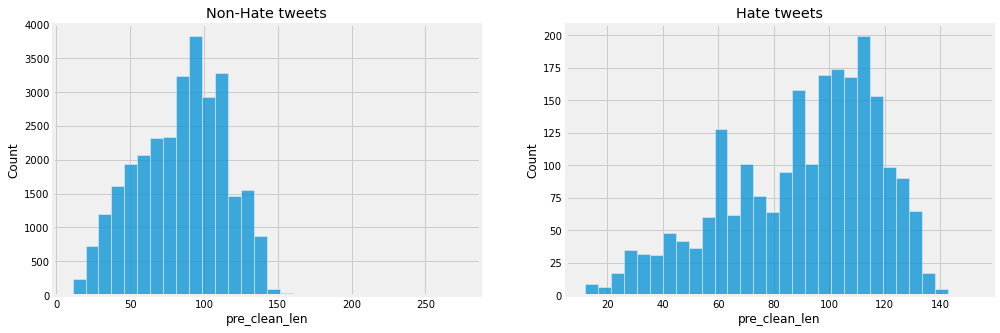

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(train[train["label"] == 0]["pre_clean_len"],bins = 30,ax = ax1).set(title = "Non-Hate tweets")
sns.histplot(train[train["label"] == 1]["pre_clean_len"],bins = 30,ax = ax2).set(title = "Hate tweets")
plt.show()

The distribution of both seems to be almost same. 90 to 120 characters in a tweet are the most common among both.

**Tweet lengths**

In [52]:
#Minimum Length tweet
train[train['pre_clean_len']==11]['tweet'].iloc[0]

'i love you '

In [53]:
#Maximum Length tweet
train[train['pre_clean_len']==274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [54]:
# Tweets with average length
train[train['pre_clean_len']==85]

id  label  \
115      116      0   
242      243      0   
384      385      0   
573      574      0   
634      635      0   
...      ...    ...   
31393  31394      0   
31468  31469      0   
31542  31543      0   
31773  31774      0   
31799  31800      0   

                                                                                       tweet  \
115     â #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex   
242    make today count! #mondaymotivation #livelifetothefullest   #healthy #everydaycounts    
384    dream palace, can we move in already? #stellar   #girls #dreamy #goodmorning daysâ¦    
573    @user monkeys are also declared as vermin. no protest from bajrang dal?   @user @user   
634    save thousands $$ free search x logins x brokers    #actor #seeklearning   #stafresh    
...                                                                                      ...   
31393  #flagday2016   #flag #day #2016 #(30 #photos) buy things about "flag day 2016": â¦     
31468  jts88troxy theater   jts88@user ð #love #sinkthepink #music #instagay #celebspot     
31542  stretched to the limit and still #waiting patiently! #overdue #maybetomorrow #love      
31773  this reminds me of this. i am   love these two ... they are golden. #arrow  #olicity    
31799  can #lighttherapy help with   or #depression?   #altwaystoheal #healthy is #happy !!    

       pre_clean_len  
115               85  
242               85  
384               85  
573               85  
634               85  
...              ...  
31393             85  
31468             85  
31542             85  
31773             85  
31799             85  

[387 rows x 4 columns]

**Lets split** the positive and negative tweets into two different lists.

**Split negative and positive tweets**

In [13]:
# Now separting positive and negative tweets
positive = train[train['label']==1]
positive

id  label  \
13        14      1   
14        15      1   
17        18      1   
23        24      1   
34        35      1   
...      ...    ...   
31934  31935      1   
31946  31947      1   
31947  31948      1   
31948  31949      1   
31960  31961      1   

                                                                                                                  tweet  \
13                                           @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot     
14                no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins   
17                                                                                               retweet if you agree!    
23                                                                      @user @user lumpy says i am a . prove it lumpy.   
34             it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia    
...                                                                                                                 ...   
31934                                                       lady banned from kentucky mall. @user  #jcpenny #kentucky     
31946                                @user omfg i'm offended! i'm a  mailbox and i'm proud! #mailboxpride  #liberalisme   
31947  @user @user you don't have the balls to hashtag me as a  but you say i am to weasel away.. lumpy tony.. dipshit.   
31948                            makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!   
31960                                               @user #sikh #temple vandalised in in #calgary, #wso condemns  act     

       pre_clean_len  
13                74  
14               101  
17                22  
23                47  
34               104  
...              ...  
31934             59  
31946             82  
31947            112  
31948             87  
31960             67  

[2242 rows x 4 columns]

In [14]:
negative = train[train['label']==0]
negative

id  label  \
0          1      0   
1          2      0   
2          3      0   
3          4      0   
4          5      0   
...      ...    ...   
31956  31957      0   
31957  31958      0   
31958  31959      0   
31959  31960      0   
31961  31962      0   

                                                                                                                                     tweet  \
0                                    @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1               @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                      bihday your majesty   
3                                                   #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                   factsguide: society now    #motivation   
...                                                                                                                                    ...   
31956                                                                        off fishing tomorrow @user carnt wait first time in 2 years     
31957                                                                 ate @user isz that youuu?ðððððððððâ¤ï¸    
31958    to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher   
31959                                                                      listening to sad songs on a monday morning otw to work is sad     
31961                                                                                                     thank you @user for you follow     

       pre_clean_len  
0                102  
1                122  
2                 21  
3                 86  
4                 39  
...              ...  
31956             61  
31957             68  
31958            131  
31959             63  
31961             32  

[29720 rows x 4 columns]

In [15]:
# Exact numbers of positive tweet length
print('Positive Tweets:')
print('Minimum number of words are',positive.pre_clean_len.min())
print('Maximum number of words are',positive.pre_clean_len.max())

Positive Tweets:
Minimum number of words are 12
Maximum number of words are 152


In [16]:
# Exact numbers of negative tweet length
print('Negative Tweets:')
print('Minimum number of words are',negative.pre_clean_len.min())
print('Maximum number of words are',negative.pre_clean_len.max())

Negative Tweets:
Minimum number of words are 11
Maximum number of words are 274


It looks that negative (non-offensive) tweets tend to be longer than positive tweets

###  Box plot

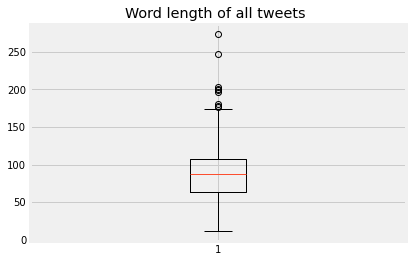

In [17]:
#Box plot of all data
plt.boxplot(train.pre_clean_len)
plt.title('Word length of all tweets ')
plt.show()

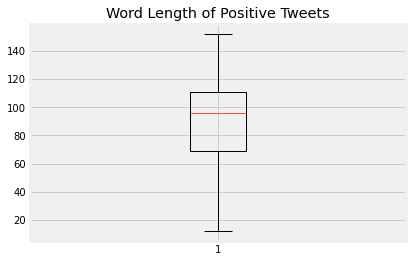

In [18]:
#Box plot of positive data
plt.boxplot(train[train['label']==1].pre_clean_len)
plt.title('Word Length of Positive Tweets')
plt.show()

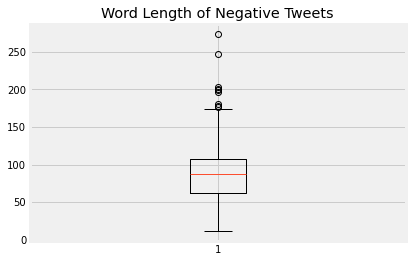

In [19]:
#Box plot of negative tweets
plt.boxplot(train[train['label']==0].pre_clean_len)
plt.title('Word Length of Negative Tweets')
plt.show()

**Box plot analysis**

1. **Negative class:** There are few outliers and the maximum length of the tweets going beyond 270
2. **Positive class:** There are no ouliers and the maximum numbers of words in a tweet are approxx 150

###  Wordcloud

**1) Word cloud of all tweets**

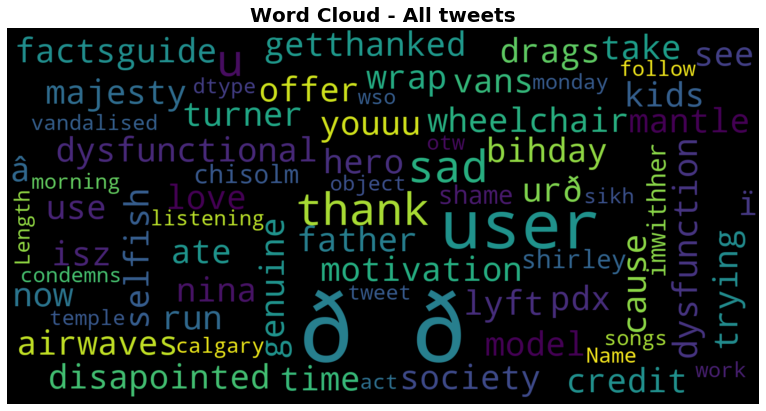

In [62]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(train['tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - All tweets',fontsize=20,fontweight='bold')
plt.show()

**2) Word cloud of positive tweets**

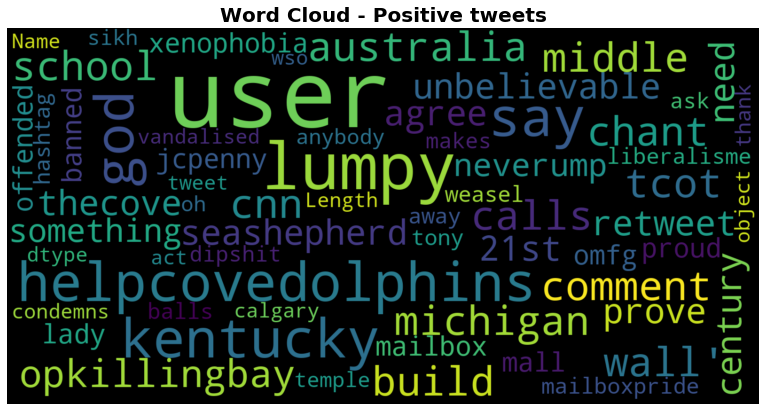

In [65]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(train[train['label']==1]['tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Positive tweets',fontsize=20,fontweight='bold')
plt.show()

**3) Word cloud of negative tweets**

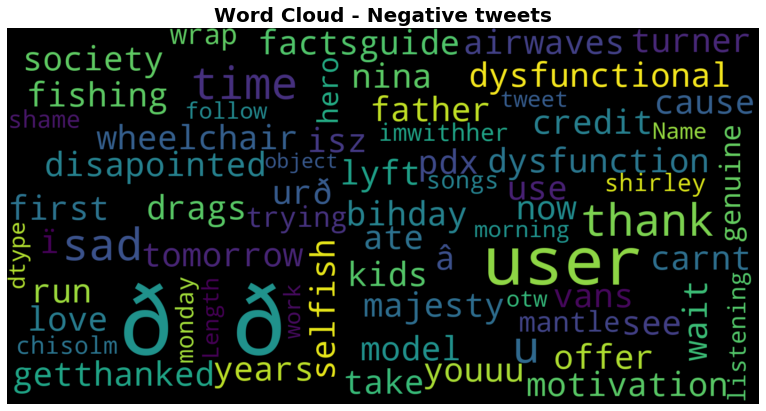

In [64]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(train[train['label']==0]['tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Negative tweets',fontsize=20,fontweight='bold')
plt.show()